In [1]:
%load_ext autotime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

time: 1.08 s (started: 2022-10-11 21:28:44 +08:00)


In [2]:
# reopen the pickle file from previous notebook
# recall that x is the fundamentals data and y is the price data
x = pickle.load(open('./data/01_fundamentals.pkl', 'rb'))
y = pickle.load(open('./data/01_pricedata.pkl', 'rb'))

time: 31 ms (started: 2022-10-11 21:28:45 +08:00)


In [3]:
x.head()

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period_x,Publish Date,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,2016-10-31,45846,USD,2016,Q4,2016-12-20,2018-12-20,324000000.0,328000000.0,...,234000000.0,-52000000.0,0.0,-26000000.0,-78000000.0,-38000000.0,27000000.0,-43000000.0,-56000000.0,90000000
1,A,2017-01-31,45846,USD,2017,Q1,2017-03-08,2018-03-06,322000000.0,326000000.0,...,116000000.0,-32000000.0,NaN,-69000000.0,-101000000.0,-42000000.0,89000000.0,-93000000.0,-58000000.0,-48000000
2,A,2017-04-30,45846,USD,2017,Q2,2017-06-06,2018-05-31,321000000.0,325000000.0,...,257000000.0,-43000000.0,NaN,0.0,-43000000.0,-43000000.0,52000000.0,-75000000.0,-67000000.0,148000000
3,A,2017-07-31,45846,USD,2017,Q3,2017-09-06,2018-08-30,321000000.0,326000000.0,...,228000000.0,-43000000.0,NaN,-57000000.0,-101000000.0,-42000000.0,39000000.0,32000000.0,29000000.0,174000000
4,A,2017-10-31,45846,USD,2017,Q4,2017-12-21,2018-12-20,324000000.0,327000000.0,...,288000000.0,-58000000.0,0.0,0.0,-60000000.0,-43000000.0,-70000000.0,8000000.0,-106000000.0,115000000


time: 31 ms (started: 2022-10-11 21:28:45 +08:00)


In [4]:
y.head()

,Ticker,Date1,Open1,Volume1,Date2,Open2,Volume2
0,A,2016-10-31,43.33,1556762.0,2017-10-31,67.74,1609938.0
1,A,2017-01-31,48.04,2552612.0,2018-01-31,73.77,1949108.0
2,A,2017-04-30,55.50,1897018.0,2018-04-30,66.49,2277705.0
3,A,2017-07-31,60.32,1038744.0,2018-07-31,64.93,2539265.0
4,A,2017-10-31,67.74,1609938.0,2018-10-31,64.35,3820987.0


time: 16 ms (started: 2022-10-11 21:28:45 +08:00)


In [5]:
# x and y should have the same number of rows
print(x.shape)
print(y.shape)

(41032, 74)
(41032, 7)
time: 0 ns (started: 2022-10-11 21:28:45 +08:00)


# EDA and Data Cleaning

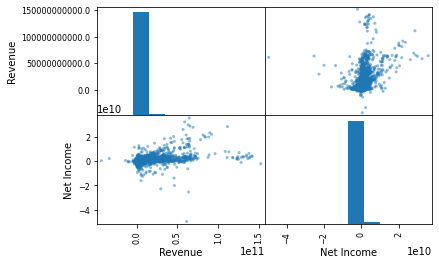

time: 469 ms (started: 2022-10-11 21:28:45 +08:00)


In [6]:
# plotting a scatter of revenue vs net income (which should show a positive correlation)
from pandas.plotting import scatter_matrix

attributes=["Revenue", "Net Income"]
scatter_matrix(x[attributes]);

In [7]:
# Finding out if there are stocks that trade less than 10,000 shares a day
y.query("Volume1 < 1e4 or Volume2 < 1e4")

,Ticker,Date1,Open1,Volume1,Date2,Open2,Volume2
212,ABCD,2016-12-31,5.00,9679.0,2017-12-31,5.60,117353.0
214,ABCD,2017-06-30,5.02,9448.0,2018-06-30,11.11,198860.0
244,ABIO,2016-12-31,52.20,2240.0,2017-12-31,25.20,1790.0
245,ABIO,2017-03-31,45.00,2840.0,2018-03-31,8.99,39143.0
246,ABIO,2017-06-30,43.20,5097.0,2018-06-30,10.80,10297.0
...,...,...,...,...,...,...,...
40775,ZDGE,2019-01-31,1.88,12331.0,2020-01-31,1.70,592.0
40777,ZDGE,2019-07-31,1.86,8814.0,2020-07-30,1.43,19142.0
40779,ZDGE,2020-01-31,1.70,592.0,2021-01-30,7.45,276914.0
40887,ZOM,2018-09-30,1.97,9801.0,2019-09-30,0.40,43695.0


time: 15 ms (started: 2022-10-11 21:28:46 +08:00)


In [8]:
# In X, there are some stocks with no shares outstanding
x[x["Shares (Diluted)_x"].isnull()]

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period_x,Publish Date,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
1193,AGI,2016-12-31,111482,USD,2016,Q4,2017-03-31,2017-03-31,NaN,NaN,...,-12100000.0,NaN,NaN,NaN,-9700000.0,NaN,-2000000.0,NaN,-2200000.0,-25400000
1194,AGI,2017-03-31,111482,USD,2017,Q1,2017-05-12,2017-05-12,NaN,NaN,...,9500000.0,NaN,NaN,NaN,-10500000.0,NaN,-1900000.0,NaN,-1900000.0,-2600000
1753,ALLK,2018-06-30,1872547,USD,2018,Q2,2018-08-07,2019-08-05,NaN,NaN,...,-8108000.0,-1633000.0,-44746000.0,NaN,-46379000.0,NaN,50000.0,291000.0,-818000.0,-55305000
1754,ALLK,2018-09-30,1872547,USD,2018,Q3,2018-11-07,2019-11-12,NaN,NaN,...,-8352000.0,-2611000.0,-96710000.0,NaN,-99321000.0,NaN,0.0,138407000.0,140013000.0,32340000
1755,ALLK,2018-12-31,1872547,USD,2018,Q4,2019-02-07,2021-03-01,NaN,NaN,...,-12649000.0,-2685000.0,-2645000.0,NaN,-5330000.0,NaN,0.0,4000.0,4000.0,-17975000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38489,VOR,2021-03-31,1872586,USD,2021,Q1,2021-05-06,2022-05-12,NaN,NaN,...,-17649000.0,-1171000.0,NaN,NaN,-1171000.0,NaN,NaN,234592000.0,232848000.0,214028000
38490,VOR,2021-06-30,1872586,USD,2021,Q2,2021-08-09,2022-08-11,NaN,NaN,...,-16565000.0,-919000.0,-75122000.0,NaN,-76041000.0,NaN,NaN,26000.0,-445000.0,-93051000
38491,VOR,2021-09-30,1872586,USD,2021,Q3,2021-11-10,2021-11-10,NaN,NaN,...,-17343000.0,-636000.0,-7850000.0,NaN,-8486000.0,NaN,45375000.0,-45174000.0,201000.0,-25628000
38864,VTYX,2021-09-30,1822460,USD,2021,Q3,2021-11-15,2021-11-18,NaN,NaN,...,-11030000.0,-203000.0,-72960000.0,0.0,-73163000.0,NaN,0.0,50825000.0,50379000.0,-33802000


time: 32 ms (started: 2022-10-11 21:28:46 +08:00)


In [9]:
# Create a few filters to get rid of unwanted rows
# Filter out rows with no share price
filter1 = y['Open1'].notnull()

# Filter out shares with low/no volume (less than 10k traded)
filter2 = (y['Volume1']>1e4) | (y['Volume2']>1e4)

# Filter out rows with missing prices (esp those whose Date2 is after Oct 2021)
filter3 = y['Open2'].notnull()

# Filter out rows with no outstanding shares
filter4 = x["Shares (Diluted)_x"].notnull()

time: 0 ns (started: 2022-10-11 21:28:46 +08:00)


In [10]:
# Apply above 4 filters to y dataframe
y = y[filter1 & filter2 & filter3 & filter4].reset_index(drop=True)
y

,Ticker,Date1,Open1,Volume1,Date2,Open2,Volume2
0,A,2016-10-31,43.33,1556762.0,2017-10-31,67.74,1609938.0
1,A,2017-01-31,48.04,2552612.0,2018-01-31,73.77,1949108.0
2,A,2017-04-30,55.50,1897018.0,2018-04-30,66.49,2277705.0
3,A,2017-07-31,60.32,1038744.0,2018-07-31,64.93,2539265.0
4,A,2017-10-31,67.74,1609938.0,2018-10-31,64.35,3820987.0
...,...,...,...,...,...,...,...
29645,ZYXI,2019-09-30,8.65,177336.0,2020-09-29,15.33,382097.0
29646,ZYXI,2019-12-31,7.13,129247.0,2020-12-30,12.13,487832.0
29647,ZYXI,2020-03-31,9.71,308449.0,2021-03-31,13.60,423240.0
29648,ZYXI,2020-06-30,20.95,1160230.0,2021-06-30,14.13,144577.0


time: 16 ms (started: 2022-10-11 21:28:46 +08:00)


In [11]:
# Apply all 4 filters to x dataframe
X = x[filter1 & filter2 & filter3 & filter4].reset_index(drop=True)
X

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period_x,Publish Date,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,2016-10-31,45846,USD,2016,Q4,2016-12-20,2018-12-20,324000000.0,328000000.0,...,234000000.0,-52000000.0,0.0,-26000000.0,-78000000.0,-38000000.0,27000000.0,-43000000.0,-56000000.0,90000000
1,A,2017-01-31,45846,USD,2017,Q1,2017-03-08,2018-03-06,322000000.0,326000000.0,...,116000000.0,-32000000.0,NaN,-69000000.0,-101000000.0,-42000000.0,89000000.0,-93000000.0,-58000000.0,-48000000
2,A,2017-04-30,45846,USD,2017,Q2,2017-06-06,2018-05-31,321000000.0,325000000.0,...,257000000.0,-43000000.0,NaN,0.0,-43000000.0,-43000000.0,52000000.0,-75000000.0,-67000000.0,148000000
3,A,2017-07-31,45846,USD,2017,Q3,2017-09-06,2018-08-30,321000000.0,326000000.0,...,228000000.0,-43000000.0,NaN,-57000000.0,-101000000.0,-42000000.0,39000000.0,32000000.0,29000000.0,174000000
4,A,2017-10-31,45846,USD,2017,Q4,2017-12-21,2018-12-20,324000000.0,327000000.0,...,288000000.0,-58000000.0,0.0,0.0,-60000000.0,-43000000.0,-70000000.0,8000000.0,-106000000.0,115000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29645,ZYXI,2019-09-30,171401,USD,2019,Q3,2019-10-29,2020-10-27,35741200.0,37484700.0,...,1841000.0,NaN,NaN,NaN,9000.0,-3000.0,0.0,33000.0,30000.0,1880000
29646,ZYXI,2019-12-31,171401,USD,2019,Q4,2020-02-27,2020-10-27,35976600.0,37511100.0,...,2098000.0,-160000.0,NaN,NaN,-28000.0,0.0,-15000.0,51000.0,36000.0,2106000
29647,ZYXI,2020-03-31,171401,USD,2020,Q1,2020-04-28,2021-04-29,36204300.0,37624400.0,...,632000.0,-297000.0,NaN,NaN,-297000.0,NaN,-11000.0,221000.0,210000.0,545000
29648,ZYXI,2020-06-30,171401,USD,2020,Q2,2020-07-28,2021-04-29,36611300.0,37899400.0,...,2651000.0,-357000.0,NaN,NaN,-357000.0,NaN,-16000.0,53000.0,37000.0,2331000


time: 46 ms (started: 2022-10-11 21:28:46 +08:00)


In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29650 entries, 0 to 29649
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Ticker   29650 non-null  object        
 1   Date1    29650 non-null  datetime64[ns]
 2   Open1    29650 non-null  float64       
 3   Volume1  29650 non-null  float64       
 4   Date2    29650 non-null  datetime64[ns]
 5   Open2    29650 non-null  float64       
 6   Volume2  29650 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 1.6+ MB
time: 16 ms (started: 2022-10-11 21:28:46 +08:00)


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29650 entries, 0 to 29649
Data columns (total 74 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Ticker                                           29650 non-null  object        
 1   Report Date                                      29650 non-null  datetime64[ns]
 2   SimFinId                                         29650 non-null  int64         
 3   Currency                                         29650 non-null  object        
 4   Fiscal Year                                      29650 non-null  int64         
 5   Fiscal Period_x                                  29650 non-null  object        
 6   Publish Date                                     29650 non-null  datetime64[ns]
 7   Restated Date_x                                  29650 non-null  datetime64[ns]
 8   Shares (Basic)_x                    

# Save the X and y dataframe after cleaning

In [14]:
pickle.dump(X, open('./data/02_fundamentals.pkl', 'wb'))
pickle.dump(y, open('./data/02_pricedata.pkl', 'wb'))

time: 16 ms (started: 2022-10-11 21:28:46 +08:00)


In [15]:
# save the final file to csv
X.to_csv("./data/02_fundamentals.csv")
y.to_csv("./data/02_pricedata.csv")

time: 2.06 s (started: 2022-10-11 21:28:46 +08:00)
